# **MLP Classifier sur  Titanic : Données de classes non équilibrées**

**Importer les bibliothèques nécessaires**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

**Importer la dataset**

In [ ]:
titanic_data = pd.read_csv('titanic.csv')

**Comprendre le dataset**

In [ ]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

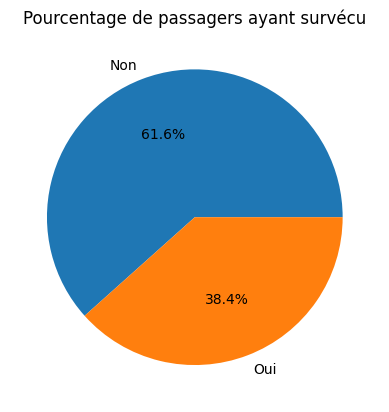

In [ ]:
survived = titanic_data['Survived'].value_counts()
plt.pie(survived, labels=['Non', 'Oui'], autopct='%1.1f%%')
plt.title('Pourcentage de passagers ayant survécu')
plt.show()


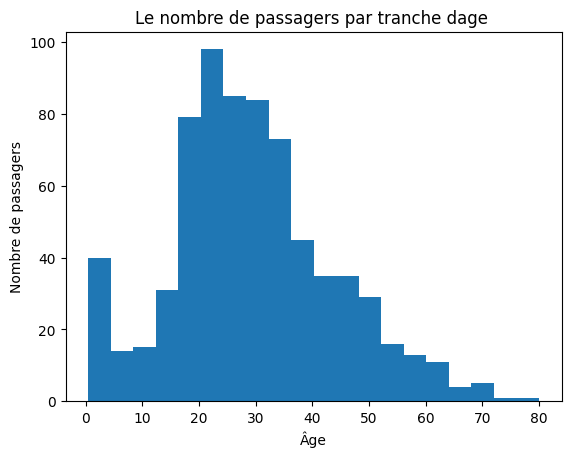

In [ ]:
plt.hist(titanic_data['Age'], bins=20)
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.title('Le nombre de passagers par tranche dage ')
plt.show()

Text(0.5, 1.0, 'Le nombre de passagers ayant survécu par sexe ')

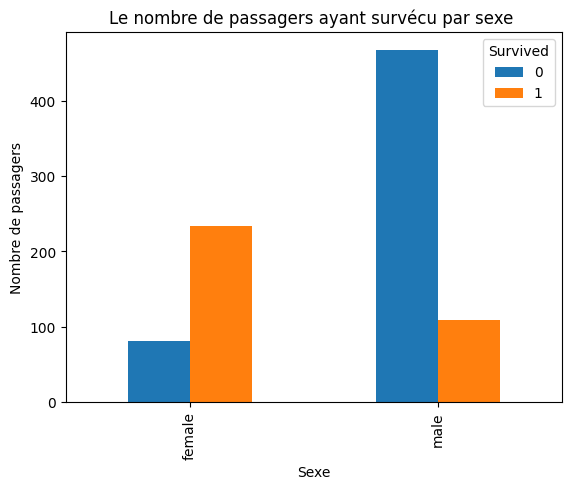

In [ ]:
df2 = titanic_data.groupby('Sex')['Survived'].value_counts().unstack()
df2.plot(kind='bar')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.title('Le nombre de passagers ayant survécu par sexe ')



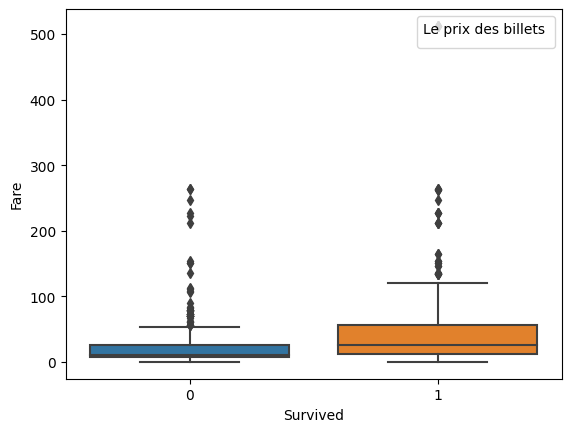

In [ ]:
data = titanic_data[['Survived', 'Fare']]
sns.boxplot(x='Survived', y='Fare', data=data)
plt.legend(title="Le prix des billets ", loc="upper right")

<ipython-input-11-db0bf9d6610c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_data.corr()


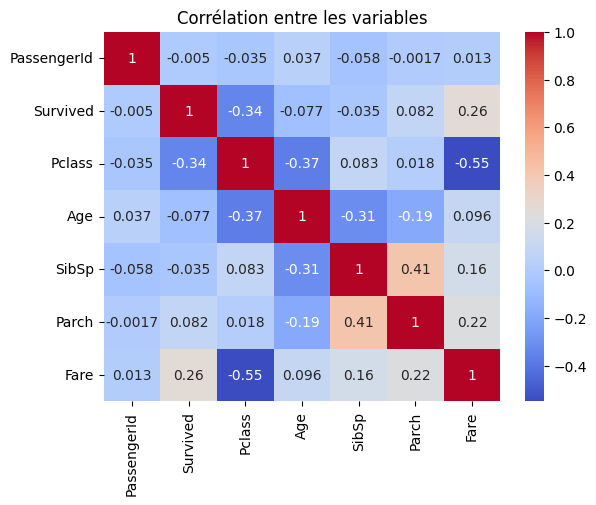

In [ ]:
corr = titanic_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables')
plt.show()


**Vérifier s'il ya des données manquantes**

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Pour la colonne cabin on remarque que la pourcentage des valeurs manquantes est égale à 77% **> 70%** du nombre des instances total donc la meilleur solution est de **supprimer** cette colonne.

**Les colonnes nom, ticket, et PassengerId sont inutiles pour notre classification.**


In [ ]:
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

**Pour le traitement des données manquantes:**
**1ere Méthode:**

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

**2éme Méthode:SimpleImputer**

In [ ]:
#imputer = SimpleImputer(strategy='median')
#titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])

In [ ]:
#imputer = SimpleImputer(strategy='most_frequent')
#titanic_data['Embarked'] = imputer.fit_transform(titanic_data[['Embarked']])

In [ ]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Pour les variables catégorielles, il est nécessaire de les encoder**

In [ ]:
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = labelencoder.fit_transform(titanic_data['Embarked'])

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Normalisation des données, pour plus de précision**

In [ ]:
scaler = MinMaxScaler()
titanic_data = pd.DataFrame(scaler.fit_transform(titanic_data), columns=titanic_data.columns, index=titanic_data.index)

**Extraction des variables expliquatives et de la variable expliquée**

**Notre variable expliquée // classe // target c'est la colonne survived**

**Le reste sont les variables expliquatives // features**

In [ ]:
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

**Diviser les données en ensemble d'entainement et ensemble de test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

**Grid Search : Pour chercher les meilleurs hyperparamètres**

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

**Inialisation du modèle Multi Layer Perception Classificator**

In [ ]:
mlp = MLPClassifier()

In [ ]:
clf = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)

**Entrainer le modèle avec l'ensemble des données d'entrainment**

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [ ]:
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


**Prédiction pour les données de test**

In [ ]:
y_pred = clf.predict(X_test)

**Evaluer le modèle**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP :", accuracy)

Accuracy of MLP : 0.8715083798882681


**Visualiser la matrice de confusion**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

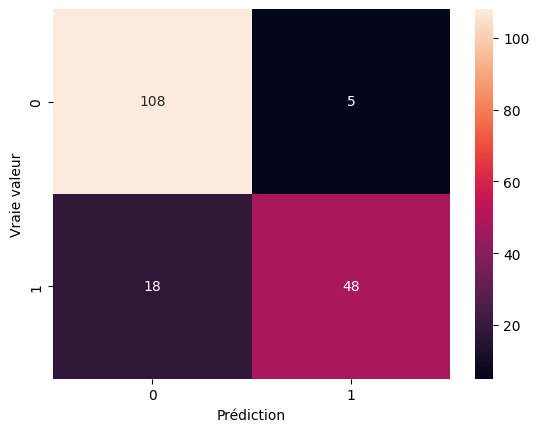

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()cm = confusion_matrix(y_test, y_pred)



**Rapport de classification**

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90       113
         1.0       0.91      0.73      0.81        66

    accuracy                           0.87       179
   macro avg       0.88      0.84      0.86       179
weighted avg       0.88      0.87      0.87       179



# **Classification avec SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVC classifier:", acc_svc)

Accuracy of SVC classifier: 0.8547486033519553


# **Classification avec KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN classifier:", acc_knn)

Accuracy of KNN classifier: 0.8100558659217877


# **MLP Accuracy**

In [ ]:
print("Accuracy of MLP :", accuracy)

Accuracy of MLP : 0.8715083798882681
